# Perceptron Trick 
- Perceptron Trick are used to saperate the 2 class.
- In this we can start with random value and move the line based on it class.
- if point as classify correctly we can't move the line other wise we can move in this way point are classify correctly.

# Formula (Logistic Regression)
- `Ax + By +C=0`


# Step Fun
- In this we `sigmoid fun`
    - `sigmoid Fun` = `1/(1+e^-x)`

# Generate Dataset

In [52]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate the dataset
X, y = make_classification(n_samples=1000,   # Number of samples
                           n_features=2,     # Number of features (inputs)
                           n_informative=1,  # Number of informative features
                           n_redundant=0,    # Number of redundant features
                           n_classes=2,      # Number of classes (output)
                           n_clusters_per_class=1,
                           hypercube=False,class_sep=5,
                           random_state=42)

# Create a DataFrame with the input features and output
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['output'] = y

In [53]:
df.head(3)

,feature1,feature2,output
0,-1.356057,-1.237821,0
1,3.485901,0.030162,1
2,-1.212371,-2.525719,0


In [54]:
df['output'].value_counts()

output
1    502
0    498
Name: count, dtype: int64

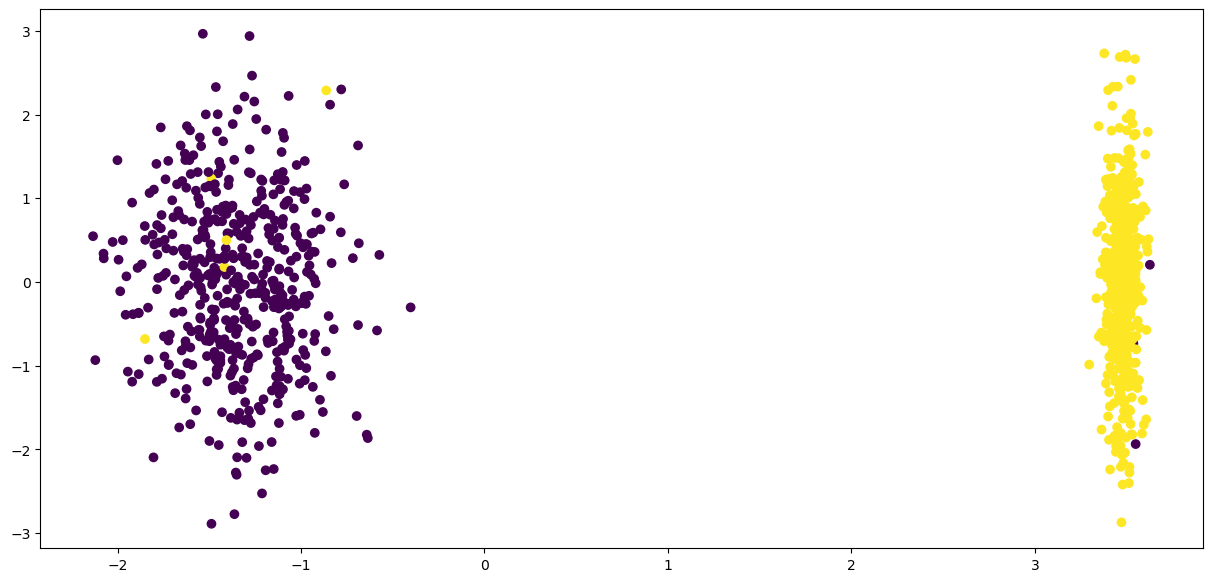

In [55]:
plt.figure(figsize=(15,7))
plt.scatter(df['feature1'],df['feature2'],c=df['output'])
plt.show()

**Now we can saperate the each class using percetron trick**

In [32]:
def step(z):
        return 0 if z<0 else 1
    
def perceotron2(x_train,y_train,epoc=1000,learning_rate=0.01):
    # Insert 1 at index 0 
    x_train=np.insert(x_train,0,1,axis=1)
    
    # Weights
    weights=np.ones(x_train.shape[1])
    
    
    for i in range(epoc):
        # Select the random point
        r_point=np.random.randint(x_train.shape[0])
        
        
        x_random=x_train[r_point]
        y_random=y_train[r_point]
        
        z=np.dot(weights,x_random)
        
        
        y_pred=step(z=z)
        
        weights+=learning_rate*(y_random-y_pred)*x_random
        
    return weights[0],weights[1:]

In [33]:
def sigmoid(z):
        return 1/(1+np.exp(-z))
    
def perceotron(x_train,y_train,epoc=1000,learning_rate=0.01):
    # Insert 1 at index 0 
    x_train=np.insert(x_train,0,1,axis=1)
    
    # Weights
    weights=np.ones(x_train.shape[1])
    
    
    for i in range(epoc):
        # Select the random point
        r_point=np.random.randint(x_train.shape[0])
        
        
        x_random=x_train[r_point]
        y_random=y_train[r_point]
        
        z=np.dot(weights,x_random)
        
        
        y_pred=sigmoid(z=z)
        
        weights+=learning_rate*(y_random-y_pred)*x_random
        
    return weights[0],weights[1:]

# Step Fun

In [34]:
intercept,coffi=perceotron(X,y,epoc=7000,learning_rate=0.01)
intercept

-1.947241500283218

In [35]:
coffi

array([0.14602667, 1.87811168])

In [36]:
m=-(coffi[0]/coffi[1])
b=-(intercept/coffi[1])

In [37]:
m

-0.07775185470639334

In [38]:
b

1.0368081531073157

In [39]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input + b

# Sigmoid

In [40]:
intercept2,coffi2=perceotron2(X,y,epoc=7000,learning_rate=0.01)
intercept2

-0.44000000000000095

In [41]:
m2=-(coffi2[0]/coffi2[1])
b2=-(intercept2/coffi2[1])

In [42]:
x_input2=np.linspace(-3,3,100)
y_input2=m2*x_input2 + b2

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [45]:
lr_intercept=model.intercept_
lr_coffi=model.coef_

In [46]:
lr_coffi

array([[0.21191887, 2.32326144]])

In [47]:
lr_intercept

array([-3.39589794])

In [48]:
m3 = -(lr_coffi[0][0] / lr_coffi[0][1])
b3 = -(lr_intercept / lr_coffi[0][1])

In [49]:
x_input3=np.linspace(-3,3,100)
y_input3=m3*x_input2 + b3

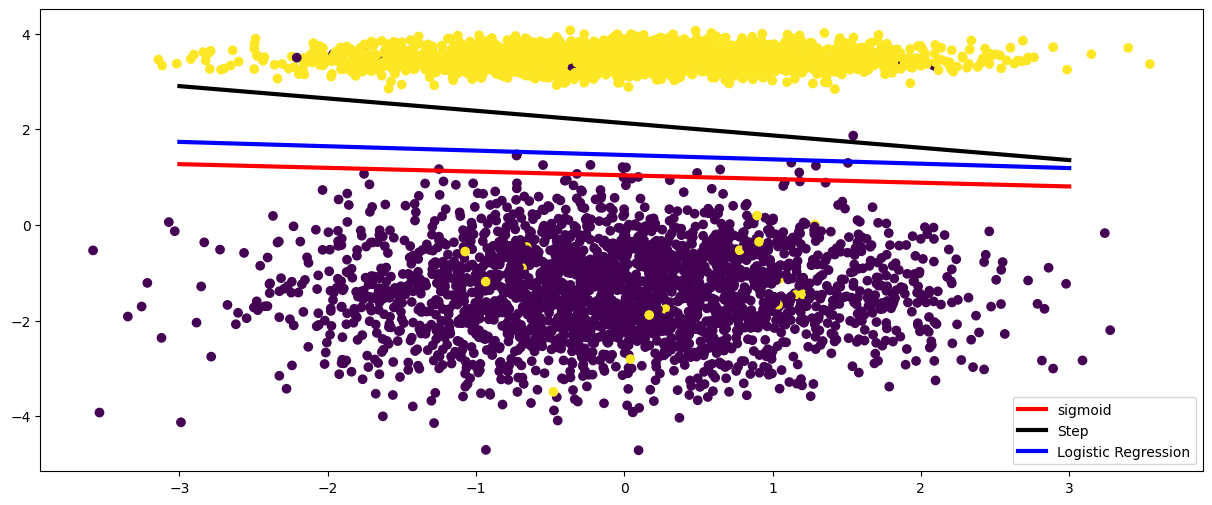

In [51]:
plt.figure(figsize=(15,6))
plt.plot(x_input,y_input,c='red',linewidth=3,label="sigmoid",)
plt.plot(x_input2,y_input2,c='black',linewidth=3,label="Step")
plt.plot(x_input3,y_input3,c='blue',linewidth=3,label="Logistic Regression")
plt.scatter(X[:,0],X[:,1],c=y)
plt.legend()
plt.show()